In [1]:
%load_ext autoreload
%autoreload 2

In [1]:
## Unzip the contents of results/outputs.zip
import zipfile
import os
from aalchem.config import paths
import pandas as pd 

def unzip_to_self_directory(zip_file_path):
    zip_dir = os.path.dirname(zip_file_path)
    extract_dir = os.path.join(zip_dir)

    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall(extract_dir)
    print(f"Extracted '{zip_file_path}' to '{extract_dir}'")

unzip_to_self_directory(paths.RESULTS / "position_model.zip")

Extracted '/Users/amac/git/phd/AAL-Chem/results/position_model.zip' to '/Users/amac/git/phd/AAL-Chem/results'


In [3]:
### Models and their names
proprietary_models = {
    'gemini_2_5_flash_thinking': 'Gemini 2.5 Flash',
    'gpt_5': 'GPT-5',
    'claude_sonnet_4_20250514': 'Claude Sonnet 4',
    'gemini_2_5_pro': 'Gemini 2.5 Pro',
}

open_source_models = { 
    'qwen3-4B-thinking-2507': 'Qwen3-4B', 
    'qwen3-30B-A3B-thinking-2507': 'Qwen3-30B', 
    'qwen3-235B-A22B-instruct-2507-FP8': 'Qwen3-235B',
    'qwen3-235B-A22B-thinking-2507-FP8': 'Qwen3-235B',
    'redhat-ai-deepseek-r1-0528-quantized_w4a16': 'DeepSeek-R1-670B', 
}

all_models = {    
    'gemini_2_5_pro': 'Gemini-2.5-Pro',
    'gpt_5': 'GPT-5',
    'claude_sonnet_4_20250514': 'Claude Sonnet 4',
    'gemini_2_5_flash_thinking': 'Gemini-2.5-Flash',
    'redhat-ai-deepseek-r1-0528-quantized_w4a16': 'DeepSeek-R1-670B', 
    'qwen3-235B-A22B-thinking-2507-FP8': 'Qwen3-235B',
    'qwen3-30B-A3B-thinking-2507': 'Qwen3-30B', 
    'qwen3-4B-thinking-2507': 'Qwen3-4B', 
    'ether0': 'Ether0', 
}

In [ ]:
from aalchem.vllm.transition_model.evaluation.get_results import get_position_model_results
### Calculate statistics for each model

for model, model_name in proprietary_models.items():
    results = get_position_model_results(
        model_name=model,
        json_dir='jsons',
        proprietary=True
    )

for model, model_name in open_source_models.items():
    results = get_position_model_results(
        model_name=model,
        json_dir='jsons',
        proprietary=False
    ) 

In [6]:
base_path = paths.RESULTS / 'position_model'
def load_dataset(model_name):
    return pd.read_csv(os.path.join(base_path, f"{model_name}/aggregated_statistics.csv"))

datasets = {
    'qwen3-4B-thinking-2507': load_dataset('qwen3-4B-thinking-2507'),
    'qwen3-30B-A3B-thinking-2507': load_dataset('qwen3-30B-A3B-thinking-2507'),
    'qwen3-235B-A22B-thinking-2507-FP8': load_dataset('qwen3-235B-A22B-thinking-2507-FP8'),
    'redhat-ai-deepseek-r1-0528-quantized_w4a16': load_dataset('redhat-ai-deepseek-r1-0528-quantized_w4a16'),
    'gemini_2_5_flash_thinking': load_dataset('gemini_2_5_flash_thinking'),
    'gpt_5': load_dataset('gpt_5'),
    'claude_sonnet_4_20250514': load_dataset('claude_sonnet_4_20250514'),
    'gemini_2_5_pro': load_dataset('gemini_2_5_pro'),
    'ether0': load_dataset('ether0'),
}

In [8]:
pdf_save_folder_path = os.path.join(paths.PLOTS, "position_model/")
os.makedirs(pdf_save_folder_path, exist_ok=True)

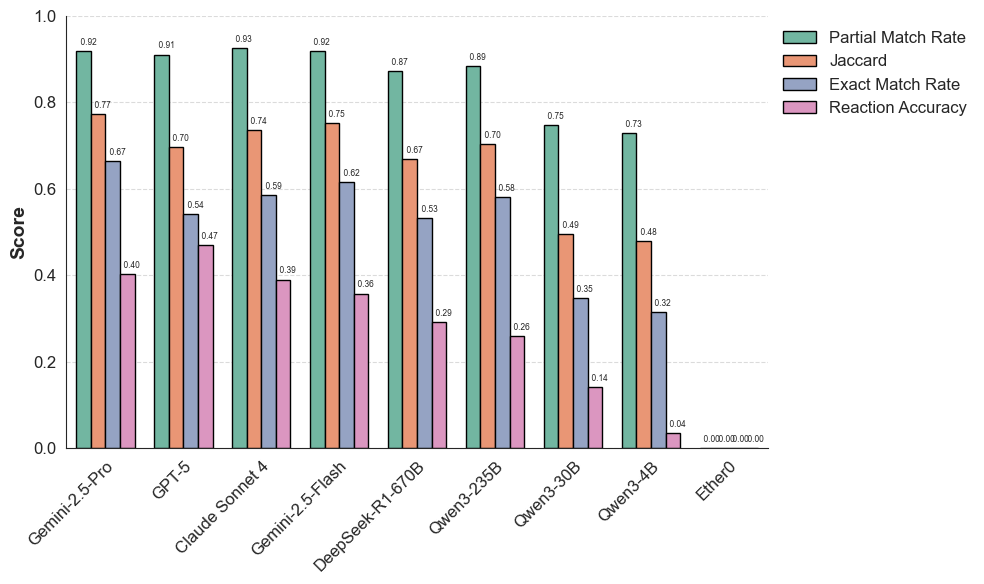

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set clean style and pleasing color palette
sns.set_style("white")
sns.set_palette("Set2")
plt.rcParams.update({'font.size': 12})

# Define metrics to plot
#metrics_to_plot = ['average_best_jaccard', 'average_best_precision', 'average_best_recall', 'best_examples_partial_match_rate', 'best_examples_exact_match_rate',  'best_examples_reaction_accuracy']
metrics_to_plot = ['best_examples_partial_match_rate', 'average_best_jaccard', 'best_examples_exact_match_rate',  'best_examples_reaction_accuracy']

# Define model names in order
model_names = ['qwen3_4b', 'qwen3_30b', 'qwen3_235b_instruct', 'qwen3_235b_thinking', 'deepseek_r1_670b', 'claude', 'gemini', 'gemini_flash', 'gemini_flash_thinking']
model_display_names = ['Qwen3-4B', 'Qwen3-30B', 'Qwen3-235B-Instruct', 'Qwen3-235B-Thinking', 'DeepSeek-R1-670B', 'Claude Sonnet 4', 'Gemini 2.5 Pro', 'Gemini 2.5 Flash', 'Gemini 2.5 Flash (thinking)']

model_names = list(all_models.keys())
model_display_names = list(all_models.values())

# Collect data
plot_data = []
for model_name, display_name in zip(model_names, model_display_names):
    df = datasets[model_name]
    for metric in metrics_to_plot:
        value = df[df['metric'] == metric]['value'].iloc[0]
        
        # Scale rates by dividing by 100
        if 'match_rate' in metric or 'reaction_accuracy' in metric:
            value = value / 100
            
        # Clean metric names
        clean_metric = metric.replace('average_best_', '').replace('best_examples_', '').replace('_', ' ').title()
        
        plot_data.append({
            'Model': display_name,
            'Metric': clean_metric,
            'Value': value
        })

plot_df = pd.DataFrame(plot_data)

# Create simple plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=plot_df, x='Model', y='Value', hue='Metric', linewidth=1, edgecolor='black', palette='Set2', width=0.75)   

# Simple customization
#plt.title('Model Performance Comparison', fontsize=16, pad=20)
plt.xlabel('')
plt.ylabel('Score', fontsize=14, fontweight='bold')
plt.xticks(fontsize=12, rotation=45, ha='right', rotation_mode='anchor')
# Faint grid
ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.ylim(0, 1)

# Remove top and right spines
sns.despine()

# Add value labels on bars
for container in ax.containers:
    ax.bar_label(container, fmt='    %.2f', fontsize=6, padding=3, label_type='edge')

plt.legend(loc='upper left', frameon=False, bbox_to_anchor=(1, 1))

plt.tight_layout()
# Save the plot as PDF
plt.savefig(f'{pdf_save_folder_path}/model_position_performance_comparison.pdf', 
            dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

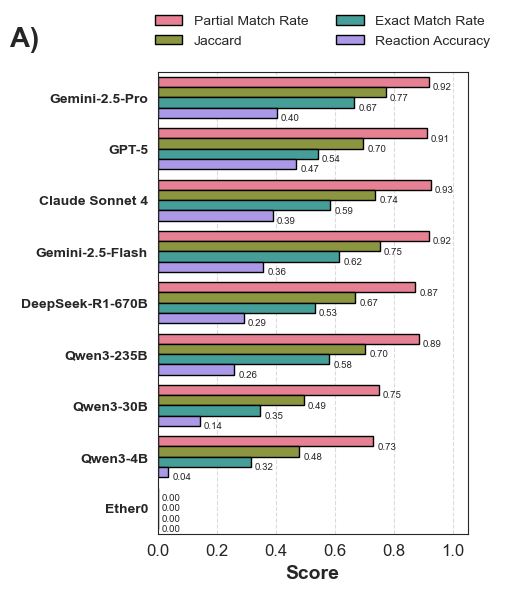

In [10]:
### Same plot but horizontal
 
sns.set_style("white")
plt.figure(figsize=(4, 6))
ax = sns.barplot(data=plot_df, x='Value', y='Model', hue='Metric', linewidth=1, edgecolor='black', palette='husl')

# Simple customization
#plt.title('Model Performance Comparison', fontsize=16, pad=20)
plt.xlabel('Score', fontsize=14, fontweight='bold')

# Add letter A) to the left of the plot
plt.text(-0.5, -1, 'A)', fontsize=20, fontweight='bold')

plt.ylabel('')
plt.xlim(0, 1.05)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.yticks(fontsize=10, fontweight='bold')
plt.xticks(fontsize=12)
## legend with two columns
plt.legend(loc='upper left', frameon=False, bbox_to_anchor=(-.05, 1.15), ncol=2, fontsize=10) 

## Add numbers on bars
for container in ax.containers:
    ax.bar_label(container, fmt='\n%.2f', fontsize=7, padding=3, label_type='edge')


## Confusion matrix

In [11]:
import pandas
import matplotlib.pyplot as plt
import seaborn as sns
pdf_save_folder_path = os.path.join(paths.PLOTS, "position_model/")
confusion_matrix = os.path.join(paths.RESULTS, "position_model", "gemini_2_5_pro", "matched_good_samples_extracted_evaluated.csv")

confusion_matrix = pandas.read_csv(confusion_matrix)
confusion_matrix

gt_id  gt_class  \
0          US05840726         1   
1          US05840726         1   
2          US05840726         1   
3          US05840726         1   
4          US05840726         1   
...               ...       ...   
6006  US20130253004A1         3   
6007  US20130253004A1         3   
6008  US20130253004A1         3   
6009  US20130253004A1         3   
6010  US20130253004A1         3   

                       gt_reactants>reagents>production  \
0     [CH2:1]=[CH:2][CH2:3][Br:26].[NH:4]([CH2:5][CH...   
1     [CH2:1]=[CH:2][CH2:3][Br:26].[NH:4]([CH2:5][CH...   
2     [CH2:1]=[CH:2][CH2:3][Br:26].[NH:4]([CH2:5][CH...   
3     [CH2:1]=[CH:2][CH2:3][Br:26].[NH:4]([CH2:5][CH...   
4     [CH2:1]=[CH:2][CH2:3][Br:26].[NH:4]([CH2:5][CH...   
...                                                 ...   
6006  [CH2:10]([CH2:11][CH2:12][c:13]1[cH:14][cH:15]...   
6007  [CH2:10]([CH2:11][CH2:12][c:13]1[cH:14][cH:15]...   
6008  [CH2:10]([CH2:11][CH2:12][c:13]1[cH:14][cH:15]...   
6009  [CH2:10]([CH2:11][CH2:12][c:13]1[cH:14][cH:15]...   
6010  [CH2:10]([CH2:11][CH2:12][c:13]1[cH:14][cH:15]...   

                                      gt_retro_reaction  gt_num_reactants  \
0     [CH2:1]=[CH:2][CH2:3][N:4]([CH2:5][CH:6]([c:7]...                 2   
1     [CH2:1]=[CH:2][CH2:3][N:4]([CH2:5][CH:6]([c:7]...                 2   
2     [CH2:1]=[CH:2][CH2:3][N:4]([CH2:5][CH:6]([c:7]...                 2   
3     [CH2:1]=[CH:2][CH2:3][N:4]([CH2:5][CH:6]([c:7]...                 2   
4     [CH2:1]=[CH:2][CH2:3][N:4]([CH2:5][CH:6]([c:7]...                 2   
...                                                 ...               ...   
6006  [CH3:1][n:2]1[n:3][cH:4][c:5]([Br:6])[c:7]1[CH...                 2   
6007  [CH3:1][n:2]1[n:3][cH:4][c:5]([Br:6])[c:7]1[CH...                 2   
6008  [CH3:1][n:2]1[n:3][cH:4][c:5]([Br:6])[c:7]1[CH...                 2   
6009  [CH3:1][n:2]1[n:3][cH:4][c:5]([Br:6])[c:7]1[CH...                 2   
6010  [CH3:1][n:2]1[n:3][cH:4][c:5]([Br:6])[c:7]1[CH...                 2   

      gt_failed_canonicalization  \
0                          False   
1                          False   
2                          False   
3                          False   
4                          False   
...                          ...   
6006                       False   
6007                       False   
6008                       False   
6009                       False   
6010                       False   

                        gt_canonicalized_retro_reaction  \
0     [CH2:1]=[CH:2][CH2:3][N:4]([CH2:5][CH:6]([c:7]...   
1     [CH2:1]=[CH:2][CH2:3][N:4]([CH2:5][CH:6]([c:7]...   
2     [CH2:1]=[CH:2][CH2:3][N:4]([CH2:5][CH:6]([c:7]...   
3     [CH2:1]=[CH:2][CH2:3][N:4]([CH2:5][CH:6]([c:7]...   
4     [CH2:1]=[CH:2][CH2:3][N:4]([CH2:5][CH:6]([c:7]...   
...                                                 ...   
6006  [CH3:1][n:2]1[n:3][cH:4][c:5]([Br:6])[c:7]1[CH...   
6007  [CH3:1][n:2]1[n:3][cH:4][c:5]([Br:6])[c:7]1[CH...   
6008  [CH3:1][n:2]1[n:3][cH:4][c:5]([Br:6])[c:7]1[CH...   
6009  [CH3:1][n:2]1[n:3][cH:4][c:5]([Br:6])[c:7]1[CH...   
6010  [CH3:1][n:2]1[n:3][cH:4][c:5]([Br:6])[c:7]1[CH...   

                               gt_canonicalized_product  \
0     [CH2:1]=[CH:2][CH2:3][N:4]([CH2:5][CH:6]([c:7]...   
1     [CH2:1]=[CH:2][CH2:3][N:4]([CH2:5][CH:6]([c:7]...   
2     [CH2:1]=[CH:2][CH2:3][N:4]([CH2:5][CH:6]([c:7]...   
3     [CH2:1]=[CH:2][CH2:3][N:4]([CH2:5][CH:6]([c:7]...   
4     [CH2:1]=[CH:2][CH2:3][N:4]([CH2:5][CH:6]([c:7]...   
...                                                 ...   
6006  [CH3:1][n:2]1[n:3][cH:4][c:5]([Br:6])[c:7]1[CH...   
6007  [CH3:1][n:2]1[n:3][cH:4][c:5]([Br:6])[c:7]1[CH...   
6008  [CH3:1][n:2]1[n:3][cH:4][c:5]([Br:6])[c:7]1[CH...   
6009  [CH3:1][n:2]1[n:3][cH:4][c:5]([Br:6])[c:7]1[CH...   
6010  [CH3:1][n:2]1[n:3][cH:4][c:5]([Br:6])[c:7]1[CH...   

      gt_canonicalized_reagents  \
0                           NaN   
1                           NaN   
2    

In [12]:
subset_partial_matches = confusion_matrix[confusion_matrix["result_is_partial_match"] == True]

# subset with only template_id, template_rxn_insight_name, template_rxn_insight_class, predicted_forwardReaction, predicted_forwardReactionClass

subset = subset_partial_matches[["template_id", "template_rxn_insight_name", "template_rxn_insight_class", "predicted_forwardReaction", "predicted_forwardReactionClass", "predicted_isInOntology", "result_is_partial_match"]]
subset

template_id                          template_rxn_insight_name  \
0               0  N-alkylation of secondary amines with alkyl ha...   
2               0  N-alkylation of secondary amines with alkyl ha...   
3               0  N-alkylation of secondary amines with alkyl ha...   
4               0  N-alkylation of secondary amines with alkyl ha...   
5               0  N-alkylation of secondary amines with alkyl ha...   
...           ...                                                ...   
5994          539                                      OtherReaction   
5995          539                                      OtherReaction   
5998          540                                      OtherReaction   
5999          540                                      OtherReaction   
6001          540                                      OtherReaction   

               template_rxn_insight_class  \
0     Heteroatom Alkylation and Arylation   
2     Heteroatom Alkylation and Arylation   
3     Heteroatom Alkylation and Arylation   
4     Heteroatom Alkylation and Arylation   
5     Heteroatom Alkylation and Arylation   
...                                   ...   
5994       Aromatic Heterocycle Formation   
5995       Aromatic Heterocycle Formation   
5998                         C-C Coupling   
5999                         C-C Coupling   
6001                         C-C Coupling   

                              predicted_forwardReaction  \
0               Boc amine protection with Boc anhydride   
2     N-alkylation of secondary amines with alkyl ha...   
3                                   reductive amination   
4     N-alkylation of secondary amines with alkyl ha...   
5                       Reductive amination with ketone   
...                                                 ...   
5994                    OtherReaction: Skraup Synthesis   
5995         OtherReaction: Doebner-von Miller Reaction   
5998                  Grignard from aldehyde to alcohol   
5999                 Organolithium addition to aldehyde   
6001           Reduction of ketone to secondary alcohol   

           predicted_forwardReactionClass  predicted_isInOntology  \
0                              Protection                    True   
2     Heteroatom Alkylation and Arylation                    True   
3                               Reduction                    True   
4     Heteroatom Alkylation and Arylation                    True   
5                               Reduction                    True   
...                                   ...                     ...   
5994       Aromatic Heterocycle Formation                   False   
5995       Aromatic Heterocycle Formation                   False   
5998                         C-C Coupling                    True   
5999                         C-C Coupling                   False   
6001                            Reduction                    True   

      result_is_partial_match  
0                        True  
2                        True  
3                        True  
4                        True  
5                        True  
...                       ...  
5994                     True  
5995                     True  
5998                     True  
5999                     True  
6001                     True  

[1877 rows x 7 columns]

In [13]:
# get all unique template_rxn_insight_name	template_rxn_insight_class	combinations
unique_combinations = subset[['template_rxn_insight_name', 'template_rxn_insight_class']].drop_duplicates()
sorted_combinations = unique_combinations.sort_values(by=['template_rxn_insight_class', 'template_rxn_insight_name'])

for i, row in sorted_combinations.iterrows():
    insight_name = row['template_rxn_insight_name']
    insight_class = row['template_rxn_insight_class']
    print(f"REACTION NAME: {insight_name} >> CLASS: {insight_class}")

REACTION NAME: Acylation of Nitrogen Nucleophiles by Acyl/Thioacyl/Carbamoyl Halides and Analogs_OS >> CLASS: Acylation
REACTION NAME: Acylation of Nitrogen Nucleophiles by Carboxylic Acids >> CLASS: Acylation
REACTION NAME: Aminolysis of esters >> CLASS: Acylation
REACTION NAME: Boc amine protection with Boc anhydride >> CLASS: Acylation
REACTION NAME: Carboxylic acid to amide conversion >> CLASS: Acylation
REACTION NAME: Carboxylic acid with primary amine to amide >> CLASS: Acylation
REACTION NAME: Ester with secondary amine to amide >> CLASS: Acylation
REACTION NAME: Formation of Sulfonic Esters >> CLASS: Acylation
REACTION NAME: Mitsunobu esterification >> CLASS: Acylation
REACTION NAME: OtherReaction >> CLASS: Acylation
REACTION NAME: Schotten-Baumann to ester >> CLASS: Acylation
REACTION NAME: Schotten-Baumann_amide >> CLASS: Acylation
REACTION NAME: Sulfonamide synthesis (Schotten-Baumann) primary amine >> CLASS: Acylation
REACTION NAME: Sulfonamide synthesis (Schotten-Baumann) 

In [14]:
unique_rxn_insight_name = subset["template_rxn_insight_name"].unique()
sorted(unique_rxn_insight_name)

['Acetal hydrolysis to aldehyde',
 'Acylation of Nitrogen Nucleophiles by Acyl/Thioacyl/Carbamoyl Halides and Analogs_OS',
 'Acylation of Nitrogen Nucleophiles by Carboxylic Acids',
 'Addition of primary amines to aldehydes/thiocarbonyls',
 'Addition of primary amines to ketones/thiocarbonyls',
 'Alcohol deprotection from silyl ethers',
 'Alcohol to ether',
 'Aldol condensation',
 'Alkylation of amines',
 'Amine and thiophosgene to isothiocyanate',
 'Aminolysis of esters',
 'Appel reaction',
 'Aromatic dehalogenation',
 'Azide to amine reduction (Staudinger)',
 'Boc amine deprotection',
 'Boc amine protection (ethyl Boc)',
 'Boc amine protection of secondary amine',
 'Boc amine protection with Boc anhydride',
 'Bouveault aldehyde synthesis',
 'Buchwald-Hartwig/Ullmann-Goldberg/N-arylation primary amine',
 'Buchwald-Hartwig/Ullmann-Goldberg/N-arylation secondary amine',
 'Carboxylic acid to amide conversion',
 'Carboxylic acid with primary amine to amide',
 'Chan-Lam etherification',
 '

In [15]:
unique_rxn_insight_class = subset["template_rxn_insight_class"].unique()
sorted(unique_rxn_insight_class)

['Acylation',
 'Aromatic Heterocycle Formation',
 'C-C Coupling',
 'Deprotection',
 'Functional Group Addition',
 'Functional Group Interconversion',
 'Heteroatom Alkylation and Arylation',
 'Miscellaneous',
 'Oxidation',
 'Protection',
 'Reduction']

In [16]:
# Create a lookup table that relates every reaction to a specific rxn insight class. 
# If a reaction is not found in the lookup table, it should be categorized as "Miscellaneous".

reaction_to_class_mapping = {
    # --- CONFLICTS TO RESOLVE ---
    # The following reactions were assigned to multiple classes. Please choose one.

    # 'OtherReaction' was assigned to 10 classes. 'Miscellaneous' is a common choice.
    'OtherReaction': 'Miscellaneous',
    
    # 'Boc amine protection with Boc anhydride' was assigned to 'Acylation', 'Functional Group Addition', 'Protection'.
    'Boc amine protection with Boc anhydride': 'Protection',

    # 'Hydrogenolysis of tertiary amines' was assigned to 'Deprotection', 'Reduction'.
    'Hydrogenolysis of tertiary amines': 'Reduction',

    # 'Dehalogenation' was assigned to 'Functional Group Interconversion', 'Reduction'.
    'Dehalogenation': 'Reduction',

    # 'Esterification of Carboxylic Acids' was assigned to 'Heteroatom Alkylation and Arylation', 'Protection'.
    'Esterification of Carboxylic Acids': 'Heteroatom Alkylation and Arylation',

    # 'N-alkylation of secondary amines with alkyl halides' was assigned to 'Heteroatom Alkylation and Arylation', 'Protection'.
    'N-alkylation of secondary amines with alkyl halides': 'Heteroatom Alkylation and Arylation',

    # 'Mitsunobu esterification' was assigned to 'Acylation', 'Protection'.
    'Mitsunobu esterification': 'Acylation',

    # --- UNAMBIGUOUS ASSIGNMENTS ---
    # Acylation
    'Acylation of Nitrogen Nucleophiles by Acyl/Thioacyl/Carbamoyl Halides and Analogs_OS': 'Acylation',
    'Acylation of Nitrogen Nucleophiles by Carboxylic Acids': 'Acylation',
    'Aminolysis of esters': 'Acylation',
    'Carboxylic acid to amide conversion': 'Acylation',
    'Carboxylic acid with primary amine to amide': 'Acylation',
    'Ester with secondary amine to amide': 'Acylation',
    'Formation of Sulfonic Esters': 'Acylation',
    'Schotten-Baumann to ester': 'Acylation',
    'Schotten-Baumann_amide': 'Acylation',
    'Sulfonamide synthesis (Schotten-Baumann) primary amine': 'Acylation',
    'Sulfonamide synthesis (Schotten-Baumann) secondary amine': 'Acylation',
    'Urea synthesis via isocyanate and diazo': 'Acylation',
    'Urea synthesis via isocyanate and primary amine': 'Acylation',
    'Urea synthesis via isocyanate and secondary amine': 'Acylation',

    # Aromatic Heterocycle Formation
    'Huisgen alkyne-azide 1,3 dipolar cycloaddition': 'Aromatic Heterocycle Formation',
    'Paal-Knorr pyrrole synthesis': 'Aromatic Heterocycle Formation',
    'Pyrazole formation': 'Aromatic Heterocycle Formation',
    'thiazole': 'Aromatic Heterocycle Formation',

    # C-C Coupling
    'Aldol condensation': 'C-C Coupling',
    'Bouveault aldehyde synthesis': 'C-C Coupling',
    'Diels-Alder': 'C-C Coupling',
    'Friedel-Crafts acylation': 'C-C Coupling',
    'Grignard_alcohol': 'C-C Coupling',
    'Heck terminal vinyl': 'C-C Coupling',
    'Henry Reaction': 'C-C Coupling',
    'Negishi': 'C-C Coupling',
    'Negishi coupling': 'C-C Coupling',
    'Sonogashira alkyne_alkenyl halide': 'C-C Coupling',
    'Sonogashira alkyne_aryl OTf': 'C-C Coupling',
    'Sonogashira alkyne_aryl halide': 'C-C Coupling',
    'Stille reaction_allyl': 'C-C Coupling',
    'Stille reaction_aryl': 'C-C Coupling',
    'Stille reaction_other': 'C-C Coupling',
    'Stille reaction_vinyl': 'C-C Coupling',
    'Stille reaction_vinyl OTf': 'C-C Coupling',
    'Suzuki': 'C-C Coupling',
    'Suzuki coupling with boronic acids': 'C-C Coupling',
    'Suzuki coupling with boronic acids OTf': 'C-C Coupling',
    'Suzuki coupling with boronic esters': 'C-C Coupling',
    'Suzuki coupling with boronic esters OTf': 'C-C Coupling',
    'Wittig reaction with triphenylphosphorane': 'C-C Coupling',
    'Wittig with Phosphonium': 'C-C Coupling',

    # Deprotection
    'Alcohol deprotection from silyl ethers': 'Deprotection',
    'Cleavage of methoxy ethers to alcohols': 'Deprotection',
    'Deprotection of carboxylic acid': 'Deprotection',
    'Ester saponification (alkyl deprotection)': 'Deprotection',
    'Ester saponification (methyl deprotection)': 'Deprotection',
    'Hydroxyl benzyl deprotection': 'Deprotection',
    'TMS deprotection from alkyne': 'Deprotection',

    # Functional Group Interconversion
    'Appel reaction': 'Functional Group Interconversion',
    'Wohl-Ziegler bromination allyl primary': 'Functional Group Interconversion',
    'Wohl-Ziegler bromination benzyl primary': 'Functional Group Interconversion',
    'Wohl-Ziegler bromination benzyl tertiary': 'Functional Group Interconversion',
    'Wohl-Ziegler bromination carbonyl tertiary': 'Functional Group Interconversion',

    # Heteroatom Alkylation and Arylation
    'Addition of primary amines to aldehydes/thiocarbonyls': 'Heteroatom Alkylation and Arylation',
    'Addition of primary amines to ketones/thiocarbonyls': 'Heteroatom Alkylation and Arylation',
    'Alcohol to ether': 'Heteroatom Alkylation and Arylation',
    'Alkylation of amines': 'Heteroatom Alkylation and Arylation',
    'Amine and thiophosgene to isothiocyanate': 'Heteroatom Alkylation and Arylation',
    'Boc amine protection (ethyl Boc)': 'Heteroatom Alkylation and Arylation',
    'Buchwald-Hartwig/Ullmann-Goldberg/N-arylation primary amine': 'Heteroatom Alkylation and Arylation',
    'Buchwald-Hartwig/Ullmann-Goldberg/N-arylation secondary amine': 'Heteroatom Alkylation and Arylation',
    'Chan-Lam etherification': 'Heteroatom Alkylation and Arylation',
    'Goldberg coupling': 'Heteroatom Alkylation and Arylation',
    'Goldberg coupling aryl amine-aryl chloride': 'Heteroatom Alkylation and Arylation',
    'Mitsunobu aryl ether': 'Heteroatom Alkylation and Arylation',
    'Mitsunobu_imide': 'Heteroatom Alkylation and Arylation',
    'N-alkylation of primary amines with alkyl halides': 'Heteroatom Alkylation and Arylation',
    'N-arylation (Buchwald-Hartwig/Ullmann-Goldberg)': 'Heteroatom Alkylation and Arylation',
    'Petasis reaction with amines and boronic acids': 'Heteroatom Alkylation and Arylation',
    'Reductive amination with alcohol': 'Heteroatom Alkylation and Arylation',
    'Reductive amination with aldehyde': 'Heteroatom Alkylation and Arylation',
    'Reductive amination with ketone': 'Heteroatom Alkylation and Arylation',
    'S-alkylation of thiols ': 'Heteroatom Alkylation and Arylation',
    'Ullmann-Goldberg Substitution amine': 'Heteroatom Alkylation and Arylation',
    'Ullmann-Goldberg Substitution thiol': 'Heteroatom Alkylation and Arylation',
    'Williamson Ether Synthesis': 'Heteroatom Alkylation and Arylation',
    'oxa-Michael addition': 'Heteroatom Alkylation and Arylation',
    'reductive amination': 'Heteroatom Alkylation and Arylation',
    'thioether_nucl_sub': 'Heteroatom Alkylation and Arylation',
    'thiourea': 'Heteroatom Alkylation and Arylation',

    # Miscellaneous
    'Acetal hydrolysis to aldehyde': 'Miscellaneous',
    'Ketal hydrolysis to ketone': 'Miscellaneous',
    'Protection of carboxylic acid': 'Miscellaneous',

    # Oxidation
    'Oxidation or Dehydrogenation of Alcohols to Aldehydes and Ketones': 'Oxidation',
    'Sulfanyl to sulfinyl': 'Oxidation',
    'Sulfanyl to sulfinyl_peroxide': 'Oxidation',

    # Protection
    'Boc amine protection of secondary amine': 'Protection',

    # Reduction
    'Azide to amine reduction (Staudinger)': 'Reduction',
    'Boc amine deprotection': 'Reduction',
    'Decarboxylation': 'Reduction',
    'Ether cleavage to primary alcohol': 'Reduction',
    'Hydrogenation (double to single)': 'Reduction',
    'Hydrogenation (triple to double)': 'Reduction',
    'Hydrogenolysis of amides/imides/carbamates': 'Reduction',
    'Hydrolysis or Hydrogenolysis of Carboxylic Esters or Thioesters': 'Reduction',
    'Phthalimide deprotection': 'Reduction',
    'Reduction of aldehydes and ketones to alcohols': 'Reduction',
    'Reduction of carboxylic acid to primary alcohol': 'Reduction',
    'Reduction of ester to primary alcohol': 'Reduction',
    'Reduction of ketone to secondary alcohol': 'Reduction',
    'Reduction of nitrile to amine': 'Reduction',
    'Reduction of nitro groups to amines': 'Reduction',
    'Reduction of primary amides to amines': 'Reduction',
    'Reduction of secondary amides to amines': 'Reduction',
    'Reduction of tertiary amides to amines': 'Reduction',
}

# Function to map reaction to class
def map_reaction_to_class(reaction_name):
    """Map a reaction name to its insight class, return 'Miscellaneous' if not found."""
    return reaction_to_class_mapping.get(reaction_name, 'Miscellaneous')

# Test the mapping
print("Testing reaction to class mapping:")
print("="*50)
test_reactions = ['Suzuki coupling with boronic acids', 'Boc amine deprotection', 'Unknown reaction']
for reaction in test_reactions:
    mapped_class = map_reaction_to_class(reaction)
    print(f"{reaction} → {mapped_class}")

print(f"\nTotal reactions mapped: {len(reaction_to_class_mapping)}")
print(f"Classes covered: {set(reaction_to_class_mapping.values())}")

Testing reaction to class mapping:
Suzuki coupling with boronic acids → C-C Coupling
Boc amine deprotection → Reduction
Unknown reaction → Miscellaneous

Total reactions mapped: 113
Classes covered: {'Protection', 'Functional Group Interconversion', 'Aromatic Heterocycle Formation', 'Reduction', 'Acylation', 'C-C Coupling', 'Miscellaneous', 'Heteroatom Alkylation and Arylation', 'Oxidation', 'Deprotection'}


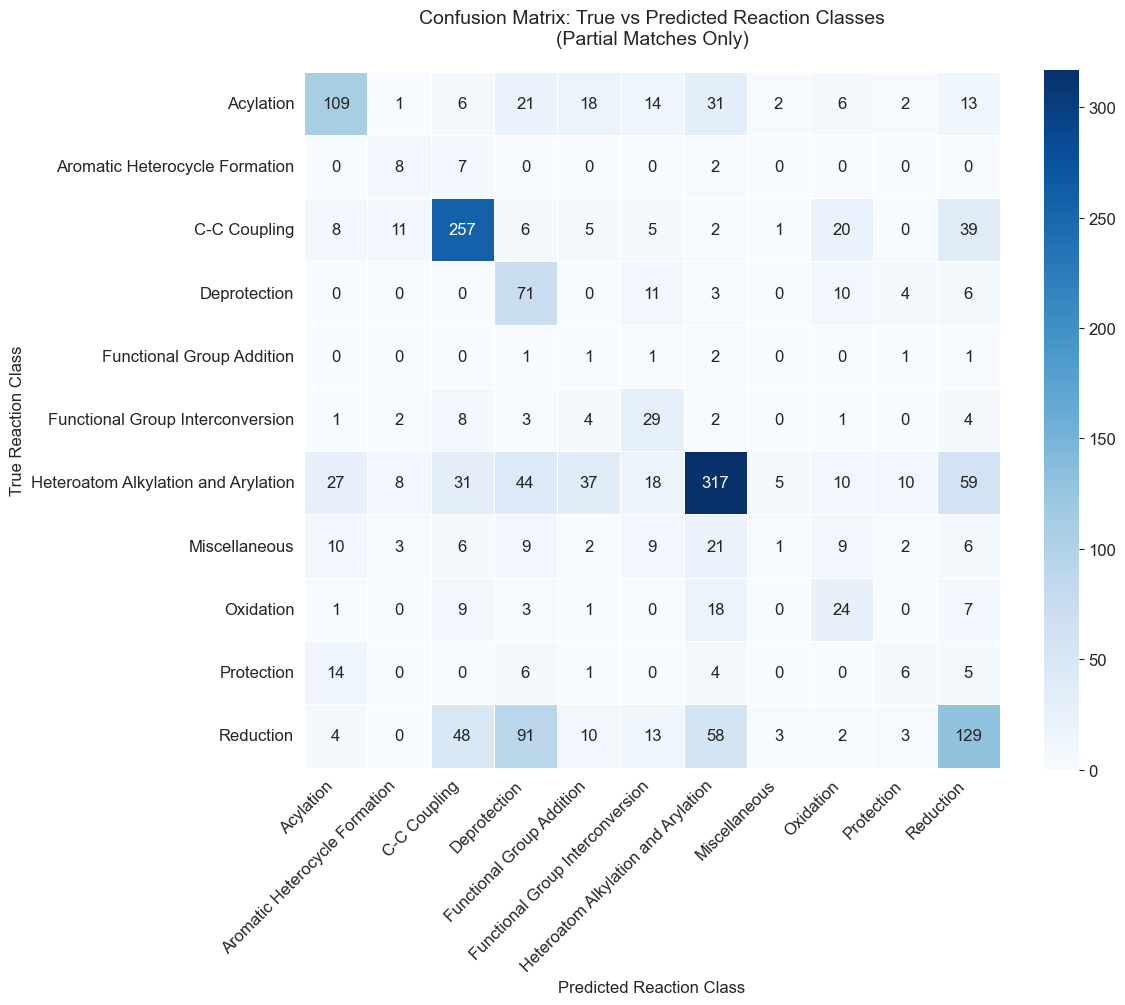

Total partial matches analyzed: 1877
Number of true reaction classes: 11
Number of predicted reaction classes: 13
Accuracy on partial matches: 0.511


In [17]:
# Create a confusion matrix that shows the relationship between template_rxn_insight_class and predicted_forwardReactionClass
from sklearn.metrics import confusion_matrix
import numpy as np

# Get unique classes for proper ordering
true_classes = sorted(subset['template_rxn_insight_class'].unique())
pred_classes = sorted(subset['predicted_forwardReactionClass'].unique())

# Create confusion matrix
cm = confusion_matrix(
    subset['template_rxn_insight_class'], 
    subset['predicted_forwardReactionClass'],
    labels=true_classes
)

# Create a figure for the confusion matrix
plt.figure(figsize=(12, 10))

# Create heatmap
sns.heatmap(
    cm, 
    annot=True, 
    fmt='d',
    xticklabels=true_classes,
    yticklabels=true_classes,
    cmap='Blues',
    square=True,
    linewidths=0.5
)

plt.title('Confusion Matrix: True vs Predicted Reaction Classes\n(Partial Matches Only)', fontsize=14, pad=20)
plt.xlabel('Predicted Reaction Class', fontsize=12)
plt.ylabel('True Reaction Class', fontsize=12)

# Rotate labels for better readability
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

plt.tight_layout()

# Save the confusion matrix plot
plt.savefig(f'{pdf_save_folder_path}/reaction_class_confusion_matrix.pdf', 
            dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

# Print summary statistics
print(f"Total partial matches analyzed: {len(subset)}")
print(f"Number of true reaction classes: {len(true_classes)}")
print(f"Number of predicted reaction classes: {len(pred_classes)}")
print(f"Accuracy on partial matches: {np.trace(cm) / np.sum(cm):.3f}")

Number of mapped classes: 10
Mapped classes: ['Acylation', 'Aromatic Heterocycle Formation', 'C-C Coupling', 'Deprotection', 'Functional Group Interconversion', 'Heteroatom Alkylation and Arylation', 'Oxidation', 'Protection', 'Reduction', 'Miscellaneous']


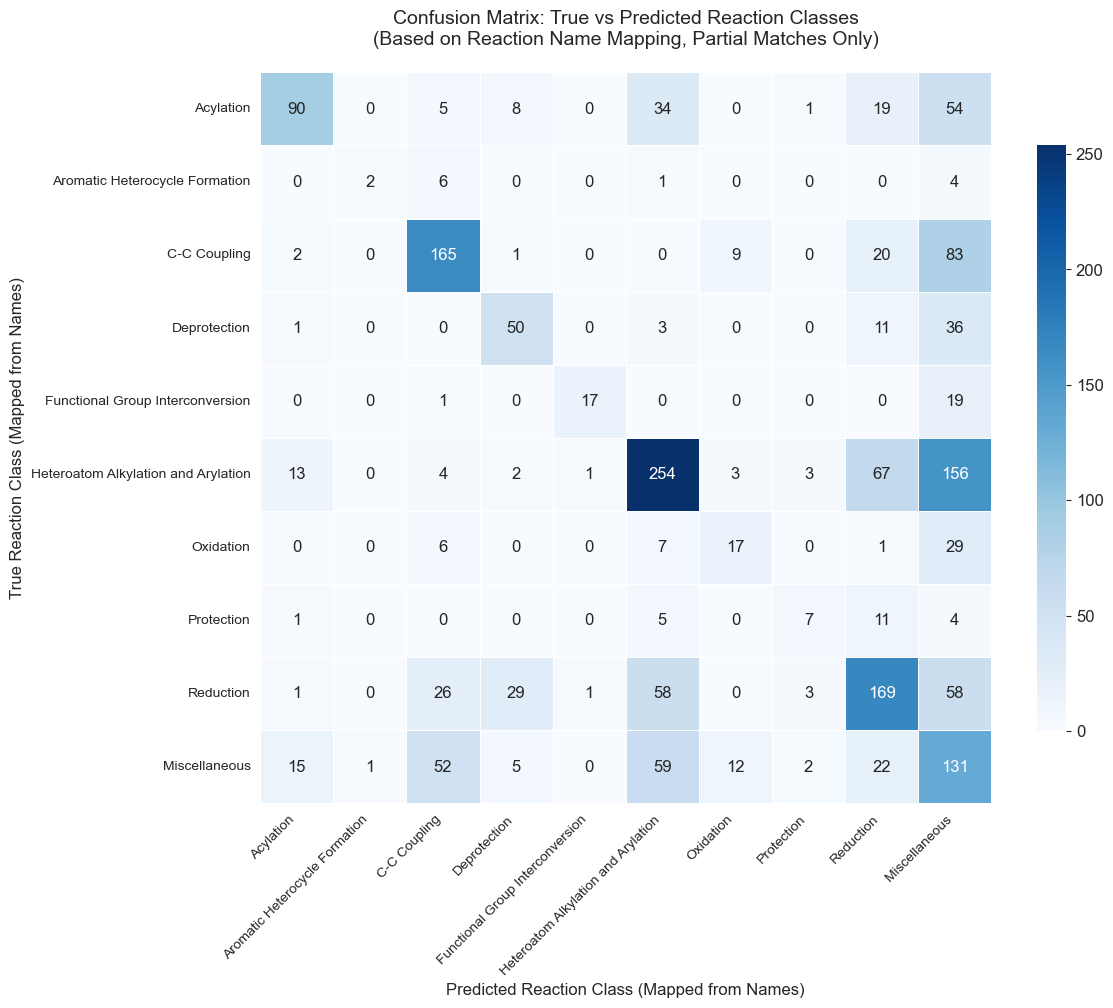

Reaction Name Mapping Analysis:
Total partial matches analyzed: 1877
Number of mapped reaction classes: 10
Accuracy on mapped classes: 0.481

Class-wise Statistics:
------------------------------
Acylation: True=211, Pred=123, Correct=90, Recall=0.427
Aromatic Heterocycle Formation: True=13, Pred=3, Correct=2, Recall=0.154
C-C Coupling: True=280, Pred=265, Correct=165, Recall=0.589
Deprotection: True=101, Pred=95, Correct=50, Recall=0.495
Functional Group Interconversion: True=37, Pred=19, Correct=17, Recall=0.459
Heteroatom Alkylation and Arylation: True=503, Pred=421, Correct=254, Recall=0.505
Oxidation: True=60, Pred=41, Correct=17, Recall=0.283
Protection: True=28, Pred=16, Correct=7, Recall=0.250
Reduction: True=345, Pred=320, Correct=169, Recall=0.490
Miscellaneous: True=299, Pred=574, Correct=131, Recall=0.438

Class Distribution Comparison:
----------------------------------------
                                     True_Count  Predicted_Count
Acylation                        

In [18]:
# Create confusion matrix on reaction names, grouped by class mapping
from sklearn.metrics import confusion_matrix
import numpy as np
import pandas as pd

# Map reaction names to classes for both true and predicted
subset_with_mapped_classes = subset.copy()
subset_with_mapped_classes['true_mapped_class'] = subset_with_mapped_classes['template_rxn_insight_name'].apply(map_reaction_to_class)
subset_with_mapped_classes['pred_mapped_class'] = subset_with_mapped_classes['predicted_forwardReaction'].apply(map_reaction_to_class)

# Get unique classes and reorder to put Miscellaneous last
all_mapped_classes_set = set(
    list(subset_with_mapped_classes['true_mapped_class'].unique()) + 
    list(subset_with_mapped_classes['pred_mapped_class'].unique())
)

# Sort classes but move Miscellaneous to the end
all_mapped_classes = sorted([cls for cls in all_mapped_classes_set if cls != 'Miscellaneous'])
if 'Miscellaneous' in all_mapped_classes_set:
    all_mapped_classes.append('Miscellaneous')

print(f"Number of mapped classes: {len(all_mapped_classes)}")
print(f"Mapped classes: {all_mapped_classes}")

# Create confusion matrix based on mapped classes
cm_mapped = confusion_matrix(
    subset_with_mapped_classes['true_mapped_class'], 
    subset_with_mapped_classes['pred_mapped_class'],
    labels=all_mapped_classes
)

# Create appropriately sized figure for the mapped confusion matrix
plt.figure(figsize=(12, 10))

# Create heatmap
sns.heatmap(
    cm_mapped, 
    annot=True, 
    fmt='d',
    xticklabels=all_mapped_classes,
    yticklabels=all_mapped_classes,
    cmap='Blues',
    square=True,
    linewidths=0.5,
    cbar_kws={'shrink': 0.8}
)

plt.title('Confusion Matrix: True vs Predicted Reaction Classes\n(Based on Reaction Name Mapping, Partial Matches Only)', 
          fontsize=14, pad=20)
plt.xlabel('Predicted Reaction Class (Mapped from Names)', fontsize=12)
plt.ylabel('True Reaction Class (Mapped from Names)', fontsize=12)

# Rotate labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)

plt.tight_layout()

# Save the mapped confusion matrix plot
plt.savefig(f'{pdf_save_folder_path}/reaction_name_mapped_confusion_matrix.pdf', 
            dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

# Print summary statistics
total_samples = np.sum(cm_mapped)
accuracy_mapped = np.trace(cm_mapped) / total_samples

print(f"Reaction Name Mapping Analysis:")
print(f"="*50)
print(f"Total partial matches analyzed: {total_samples}")
print(f"Number of mapped reaction classes: {len(all_mapped_classes)}")
print(f"Accuracy on mapped classes: {accuracy_mapped:.3f}")

# Print class-wise statistics
print(f"\nClass-wise Statistics:")
print(f"-"*30)
for i, class_name in enumerate(all_mapped_classes):
    true_count = np.sum(cm_mapped[i, :])  # Row sum (true class count)
    pred_count = np.sum(cm_mapped[:, i])  # Column sum (predicted class count)
    correct_count = cm_mapped[i, i]       # Diagonal (correct predictions)
    
    if true_count > 0:
        recall = correct_count / true_count
        print(f"{class_name}: True={true_count}, Pred={pred_count}, Correct={correct_count}, Recall={recall:.3f}")

# Show distribution of true vs predicted classes
print(f"\nClass Distribution Comparison:")
print(f"-"*40)
true_dist = subset_with_mapped_classes['true_mapped_class'].value_counts().sort_index()
pred_dist = subset_with_mapped_classes['pred_mapped_class'].value_counts().sort_index()

comparison_df = pd.DataFrame({
    'True_Count': true_dist,
    'Predicted_Count': pred_dist
}).fillna(0).astype(int)

print(comparison_df)

Number of mapped classes: 10
Mapped classes: ['Acylation', 'Aromatic Heterocycle Formation', 'C-C Coupling', 'Deprotection', 'Functional Group Interconversion', 'Heteroatom Alkylation and Arylation', 'Oxidation', 'Protection', 'Reduction', 'Miscellaneous']


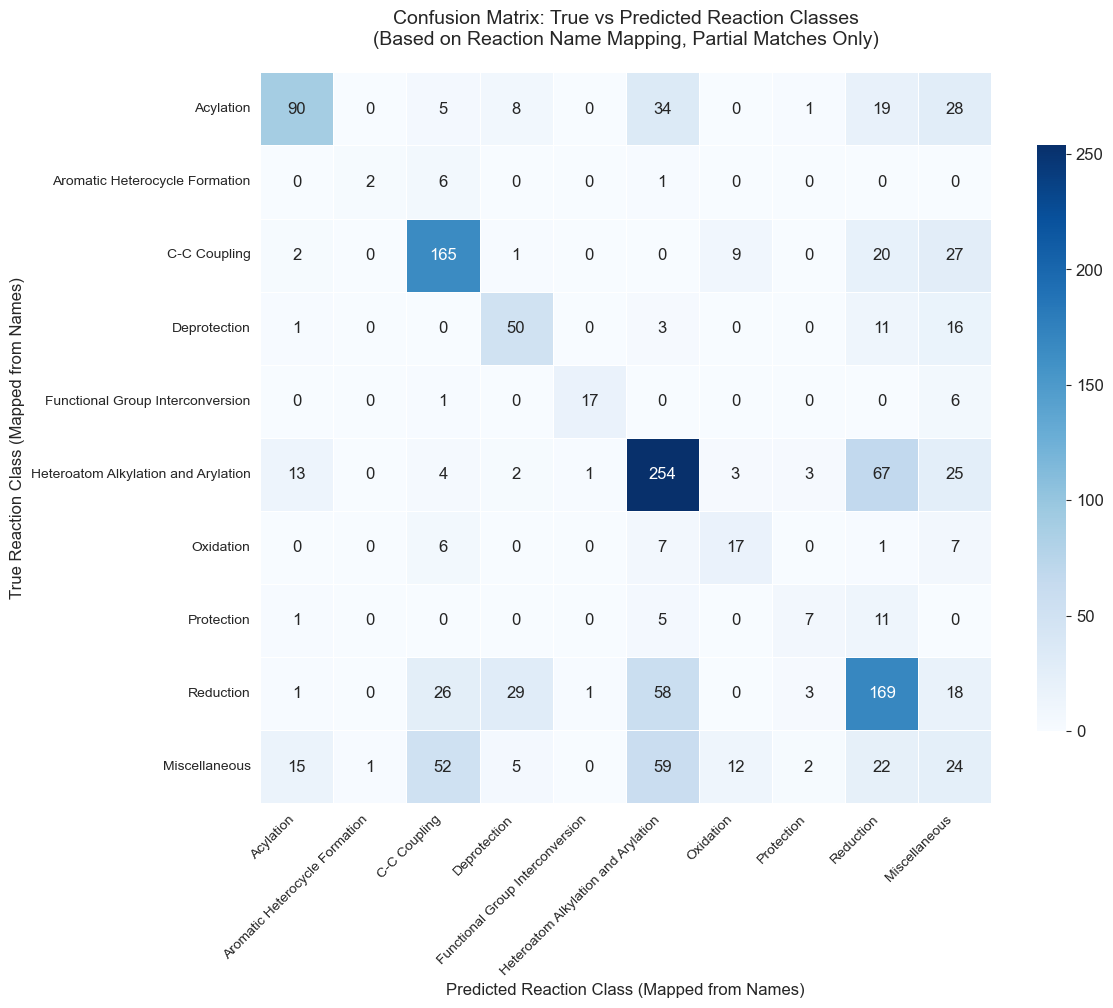

Reaction Name Mapping Analysis:
Total partial matches analyzed: 1454
Number of mapped reaction classes: 10
Accuracy on mapped classes: 0.547

Class-wise Statistics:
------------------------------
Acylation: True=185, Pred=123, Correct=90, Recall=0.486
Aromatic Heterocycle Formation: True=9, Pred=3, Correct=2, Recall=0.222
C-C Coupling: True=224, Pred=265, Correct=165, Recall=0.737
Deprotection: True=81, Pred=95, Correct=50, Recall=0.617
Functional Group Interconversion: True=24, Pred=19, Correct=17, Recall=0.708
Heteroatom Alkylation and Arylation: True=372, Pred=421, Correct=254, Recall=0.683
Oxidation: True=38, Pred=41, Correct=17, Recall=0.447
Protection: True=24, Pred=16, Correct=7, Recall=0.292
Reduction: True=305, Pred=320, Correct=169, Recall=0.554
Miscellaneous: True=192, Pred=151, Correct=24, Recall=0.125

Class Distribution Comparison:
----------------------------------------
                                     True_Count  Predicted_Count
Acylation                           

In [19]:
subset_with_mapped_classes = subset.copy()
subset_with_mapped_classes = subset_with_mapped_classes[subset_with_mapped_classes["predicted_isInOntology"] == True]
# Map reaction names to classes for both true and predicted

subset_with_mapped_classes['true_mapped_class'] = subset_with_mapped_classes['template_rxn_insight_name'].apply(map_reaction_to_class)
subset_with_mapped_classes['pred_mapped_class'] = subset_with_mapped_classes['predicted_forwardReaction'].apply(map_reaction_to_class)

# Get unique classes and reorder to put Miscellaneous last
all_mapped_classes_set = set(
    list(subset_with_mapped_classes['true_mapped_class'].unique()) + 
    list(subset_with_mapped_classes['pred_mapped_class'].unique())
)

# Sort classes but move Miscellaneous to the end
all_mapped_classes = sorted([cls for cls in all_mapped_classes_set if cls != 'Miscellaneous'])
if 'Miscellaneous' in all_mapped_classes_set:
    all_mapped_classes.append('Miscellaneous')

print(f"Number of mapped classes: {len(all_mapped_classes)}")
print(f"Mapped classes: {all_mapped_classes}")

# Create confusion matrix based on mapped classes
cm_mapped = confusion_matrix(
    subset_with_mapped_classes['true_mapped_class'], 
    subset_with_mapped_classes['pred_mapped_class'],
    labels=all_mapped_classes
)

# Create appropriately sized figure for the mapped confusion matrix
plt.figure(figsize=(12, 10))

# Create heatmap
sns.heatmap(
    cm_mapped, 
    annot=True, 
    fmt='d',
    xticklabels=all_mapped_classes,
    yticklabels=all_mapped_classes,
    cmap='Blues',
    square=True,
    linewidths=0.5,
    cbar_kws={'shrink': 0.8}
)

plt.title('Confusion Matrix: True vs Predicted Reaction Classes\n(Based on Reaction Name Mapping, Partial Matches Only)', 
          fontsize=14, pad=20)
plt.xlabel('Predicted Reaction Class (Mapped from Names)', fontsize=12)
plt.ylabel('True Reaction Class (Mapped from Names)', fontsize=12)

# Rotate labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)

plt.tight_layout()

# Save the mapped confusion matrix plot
plt.savefig(f'{pdf_save_folder_path}/reaction_name_mapped_confusion_matrix_ontology_only.pdf', 
            dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

# Print summary statistics
total_samples = np.sum(cm_mapped)
accuracy_mapped = np.trace(cm_mapped) / total_samples

print(f"Reaction Name Mapping Analysis:")
print(f"="*50)
print(f"Total partial matches analyzed: {total_samples}")
print(f"Number of mapped reaction classes: {len(all_mapped_classes)}")
print(f"Accuracy on mapped classes: {accuracy_mapped:.3f}")

# Print class-wise statistics
print(f"\nClass-wise Statistics:")
print(f"-"*30)
for i, class_name in enumerate(all_mapped_classes):
    true_count = np.sum(cm_mapped[i, :])  # Row sum (true class count)
    pred_count = np.sum(cm_mapped[:, i])  # Column sum (predicted class count)
    correct_count = cm_mapped[i, i]       # Diagonal (correct predictions)
    
    if true_count > 0:
        recall = correct_count / true_count
        print(f"{class_name}: True={true_count}, Pred={pred_count}, Correct={correct_count}, Recall={recall:.3f}")

# Show distribution of true vs predicted classes
print(f"\nClass Distribution Comparison:")
print(f"-"*40)
true_dist = subset_with_mapped_classes['true_mapped_class'].value_counts().sort_index()
pred_dist = subset_with_mapped_classes['pred_mapped_class'].value_counts().sort_index()

comparison_df = pd.DataFrame({
    'True_Count': true_dist,
    'Predicted_Count': pred_dist
}).fillna(0).astype(int)

print(comparison_df)

In [20]:
## Add the number of samples per class to the confusion matrix by adding to the y-axis labels
# The count is in bold (formatted text)
classes_with_counts = []
pred_classes_with_counts = []
for class_name in all_mapped_classes:
    count = true_dist.get(class_name, 0)
    pred_count = pred_dist.get(class_name, 0)
    if count == 0:
        true_dist.get('Aromatic Heterocycle Formation', 0)
    classes_with_counts.append(f"{class_name} $\\bf{{({count:3d})}}$")
    pred_classes_with_counts.append(f"{class_name} $\\bf{{({pred_count:3d})}}$")

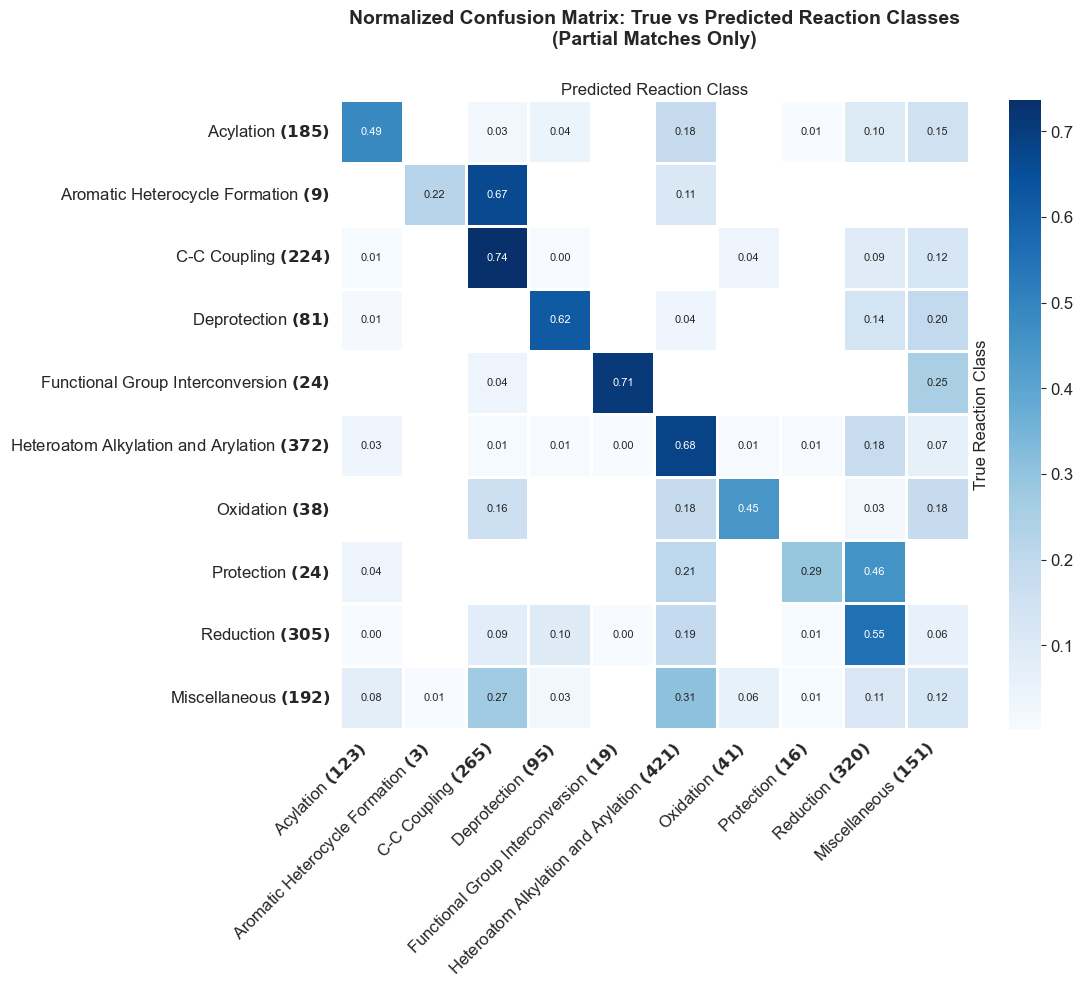

In [21]:
## Same plot as before but with rows normalized to 1 (recall per class)
# Create a figure for the confusion matrix
plt.figure(figsize=(12, 10))

# Normalize confusion matrix by row (true class)
cm_normalized = cm_mapped.astype('float') / cm_mapped.sum(axis=1)[:, np.newaxis]
cm_normalized = np.nan_to_num(cm_normalized)  # Replace NaNs with zeros

### Set the cells with 0 values to white
cm_normalized[cm_normalized == 0] = np.nan # Set zeros to NaN for white cells in heatmap
## Make sure that the annotations still show 0.00

# Create heatmap
sns.heatmap(
    cm_normalized, 
    annot=True, 
    fmt='.2f',
    ## Annotation font size
    annot_kws={"size": 8},
    xticklabels=pred_classes_with_counts,
    yticklabels=classes_with_counts,
    cmap='Blues',
    square=True,
    linewidths=1
)   
plt.title('Normalized Confusion Matrix: True vs Predicted Reaction Classes\n(Partial Matches Only)', fontsize=14, pad=40, fontweight='bold')
plt.xlabel('Predicted Reaction Class', fontsize=12)
plt.ylabel('True Reaction Class', fontsize=12)
# Rotate labels for better readability
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
## x and y axis labels on the opposite side
plt.gca().xaxis.set_label_position('top')
# plt.gca().xaxis.tick_top()
plt.gca().yaxis.set_label_position('right')
# plt.gca().yaxis.tick_right()
# Save the normalized confusion matrix plot
plt.savefig(f'{pdf_save_folder_path}/reaction_class_confusion_matrix_normalized.pdf', 
            dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

# Combined plot


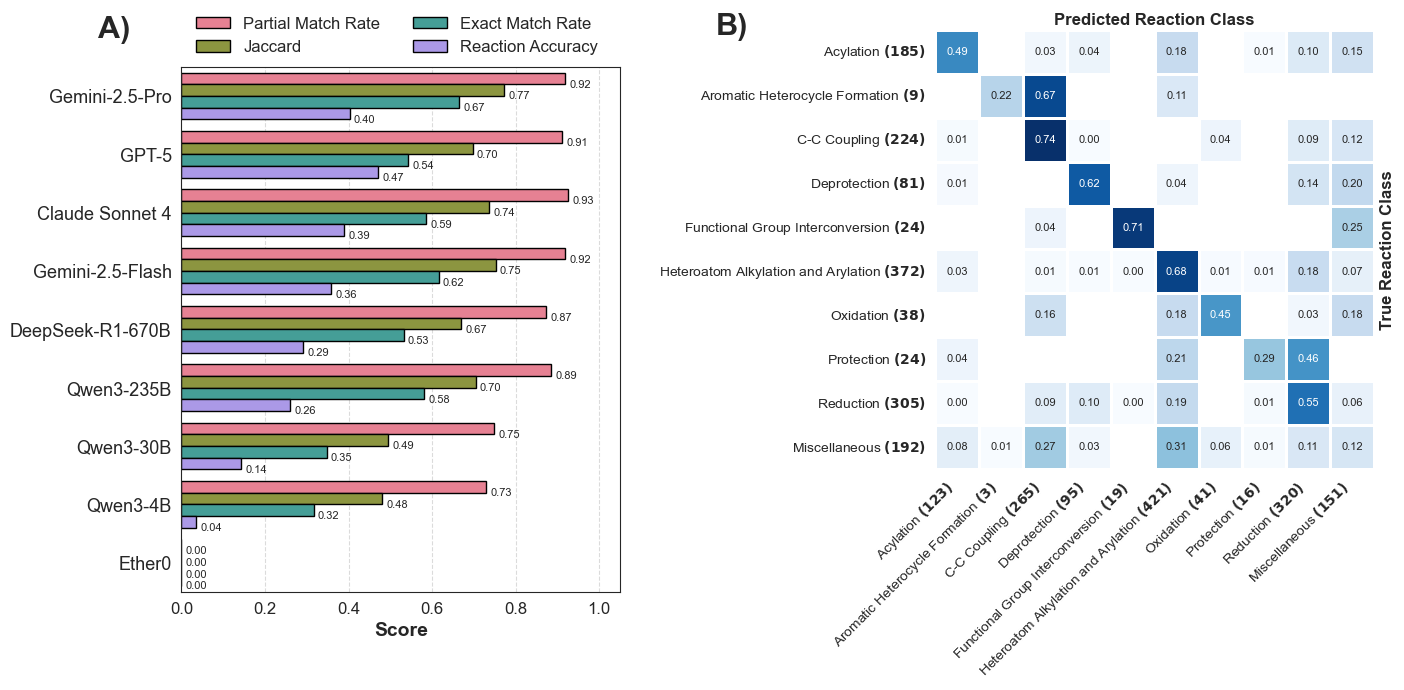

In [22]:
## Now create a joint plot of the confusion matrix and the accuracy per class

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 8))


### Same plot but horizontal
 
sns.set_style("white")
# plt.figure(figsize=(4, 6))
ax = sns.barplot(data=plot_df, x='Value', y='Model', hue='Metric', linewidth=1, edgecolor='black', palette='husl', ax=ax1)

# Simple customization
#plt.title('Model Performance Comparison', fontsize=16, pad=20)
ax1.set_xlabel('Score', fontsize=14, fontweight='bold')

# Add letter A) to the left of the plot
ax1.text(-0.2, -1, 'A)', fontsize=22, fontweight='bold')

ax1.set_ylabel('')
ax1.set_xlim(0, 1.05)
ax1.grid(axis='x', linestyle='--', alpha=0.7)
ax1.set_yticks(ax1.get_yticks(), ax1.get_yticklabels(), fontsize=13)
# ax1.set_xticks(fontsize=12)
## legend with two columns
ax1.legend(loc='upper left', frameon=False, bbox_to_anchor=(0, 1.125), ncol=2, fontsize=12) 

## Add numbers on bars
for container in ax.containers:
    ax.bar_label(container, fmt='\n%.2f', fontsize=8, padding=3, label_type='edge')
# Normalize confusion matrix by row (true class)
cm_normalized = cm_mapped.astype('float') / cm_mapped.sum(axis=1)[:, np.newaxis]
cm_normalized = np.nan_to_num(cm_normalized)  # Replace NaNs with zeros


### Set the cells with 0 values to white
cm_normalized[cm_normalized == 0] = np.nan # Set zeros to NaN for white cells in heatmap
## Make sure that the annotations still show 0.00

# Create heatmap
sns.heatmap(
    cm_normalized, 
    annot=True, 
    fmt='.2f',
    ## Annotation font size
    annot_kws={"size": 8},
    xticklabels=pred_classes_with_counts,
    yticklabels=classes_with_counts,
    cmap='Blues',
    square=True,
    linewidths=1,
    ax=ax2,
    cbar=False
)   
# plt.title('Normalized Confusion Matrix: True vs Predicted Reaction Classes\n(Partial Matches Only)', fontsize=14, pad=40, fontweight='bold')
plt.xlabel('Predicted Reaction Class', fontsize=12, fontweight='bold')
plt.ylabel('True Reaction Class', fontsize=12, fontweight='bold')
# Rotate labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.tight_layout()
## x and y axis labels on the opposite side
plt.gca().xaxis.set_label_position('top')
# plt.gca().xaxis.tick_top()
plt.gca().yaxis.set_label_position('right')
# plt.gca().yaxis.tick_right()
## No colorbar
# Save the normalized confusion matrix plot

plt.savefig(f'{pdf_save_folder_path}/reaction_class_confusion_matrix_normalized.pdf', 
            dpi=300, bbox_inches='tight', facecolor='white')

## Adjust the position of the confusion matrix to be closer to the bar plot
box = ax2.get_position()
box.y0 = box.y0 + 0.1
box.y1 = box.y1 + 0.1
ax2.set_position(box)
ax2.text(-5, 0.1, 'B)', fontsize=22, fontweight='bold')

## Save as pdf

plt.savefig(f'{pdf_save_folder_path}/position_results_conf_AB.pdf', 
            dpi=300, bbox_inches='tight', facecolor='white')

plt.show()

Total unique reactions: 128
True reactions: 108
Predicted reactions: 115
Ordered reactions by class: 128


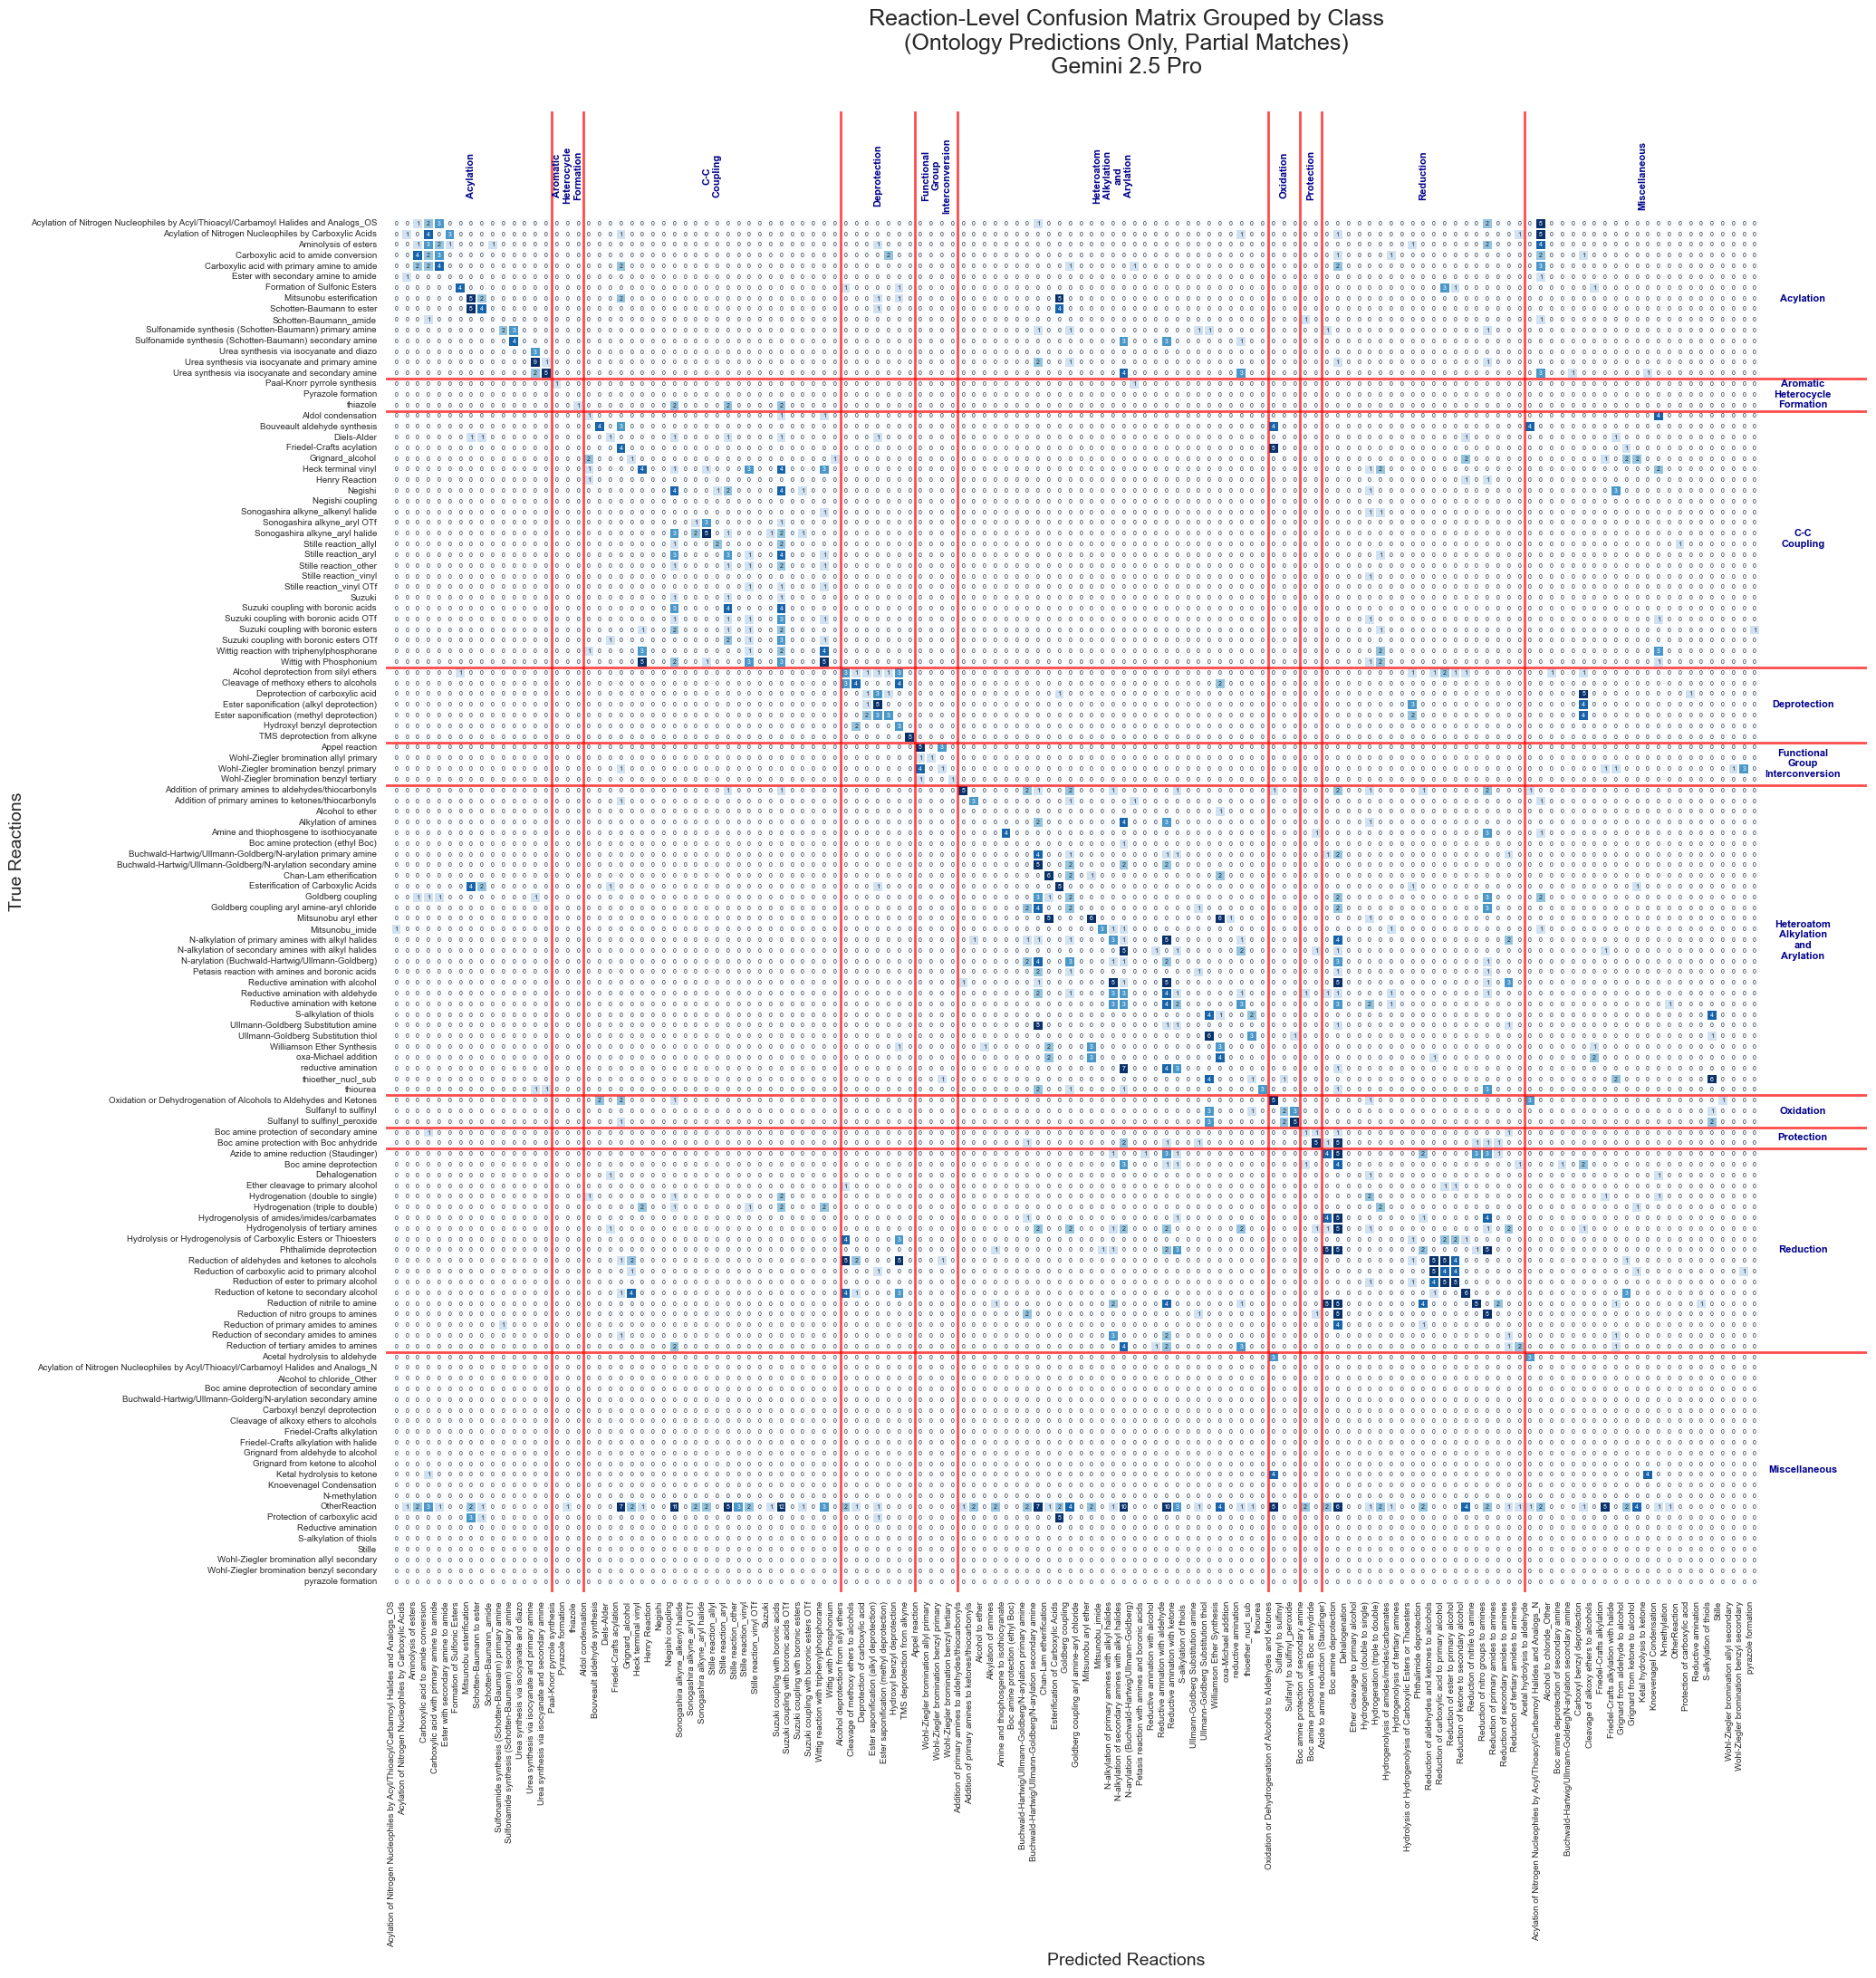

Reaction-Level Analysis (Ontology Only):
Total samples: 1454
Total unique reactions: 128
Reaction-level accuracy: 0.171

Reaction distribution by class:
Acylation: 15 reactions
Aromatic Heterocycle Formation: 3 reactions
C-C Coupling: 24 reactions
Deprotection: 7 reactions
Functional Group Interconversion: 4 reactions
Heteroatom Alkylation and Arylation: 29 reactions
Oxidation: 3 reactions
Protection: 2 reactions
Reduction: 19 reactions
Miscellaneous: 22 reactions


In [30]:
# Create reaction-level confusion matrix grouped by reaction class
from sklearn.metrics import confusion_matrix
import numpy as np

# Filter to ontology predictions only for cleaner visualization
subset_partial_matches = subset[subset["result_is_partial_match"] == True].copy()
subset_ontology = subset_partial_matches[subset_partial_matches["predicted_isInOntology"] == True]

# Get unique reaction names for both true and predicted
true_reactions = sorted(subset_ontology['template_rxn_insight_name'].unique())
pred_reactions = sorted(subset_ontology['predicted_forwardReaction'].unique())

# Combine and get all unique reactions
all_reactions = sorted(list(set(true_reactions + pred_reactions)))

print(f"Total unique reactions: {len(all_reactions)}")
print(f"True reactions: {len(true_reactions)}")
print(f"Predicted reactions: {len(pred_reactions)}")

# Create reaction-level confusion matrix
cm_reactions = confusion_matrix(
    subset_ontology['template_rxn_insight_name'], 
    subset_ontology['predicted_forwardReaction'],
    labels=all_reactions
)

# Create mapping from reaction to class for grouping
reaction_to_class_for_reactions = {}
for reaction in all_reactions:
    reaction_to_class_for_reactions[reaction] = map_reaction_to_class(reaction)

# Group reactions by their mapped classes
class_groups = {}
for reaction in all_reactions:
    mapped_class = reaction_to_class_for_reactions[reaction]
    if mapped_class not in class_groups:
        class_groups[mapped_class] = []
    class_groups[mapped_class].append(reaction)

# Sort classes and put Miscellaneous last
sorted_classes = sorted([cls for cls in class_groups.keys() if cls != 'Miscellaneous'])
if 'Miscellaneous' in class_groups:
    sorted_classes.append('Miscellaneous')

# Reorder reactions by class grouping
ordered_reactions = []
class_boundaries = []
current_pos = 0

for class_name in sorted_classes:
    class_reactions = sorted(class_groups[class_name])
    ordered_reactions.extend(class_reactions)
    current_pos += len(class_reactions)
    class_boundaries.append(current_pos)

print(f"Ordered reactions by class: {len(ordered_reactions)}")

# Reorder confusion matrix according to class grouping
reaction_to_idx = {reaction: i for i, reaction in enumerate(all_reactions)}
ordered_indices = [reaction_to_idx[reaction] for reaction in ordered_reactions]

cm_ordered = cm_reactions[np.ix_(ordered_indices, ordered_indices)]

# Create very large figure for reaction-level confusion matrix
fig, ax = plt.subplots(figsize=(26, 22))

# Create heatmap with smaller annotations and stronger colors
sns.heatmap(
    cm_ordered, 
    annot=True, 
    fmt='d',
    xticklabels=ordered_reactions,
    yticklabels=ordered_reactions,
    cmap='Blues',
    square=True,
    linewidths=0.1,
    cbar=False,  # Remove the colorbar/legend
    annot_kws={'fontsize': 5},
    vmin=0,
    vmax=max(0, 5),  
    ax=ax
)

# Add class boundaries as lines
for boundary in class_boundaries[:-1]:  # Don't add line after last class
    ax.axhline(y=boundary, color='red', linewidth=2, alpha=0.7)
    ax.axvline(x=boundary, color='red', linewidth=2, alpha=0.7)

# Customize labels and title
ax.set_title('Reaction-Level Confusion Matrix Grouped by Class\n(Ontology Predictions Only, Partial Matches)\nGemini 2.5 Pro', 
             fontsize=18, pad=30)
ax.set_xlabel('Predicted Reactions', fontsize=14)
ax.set_ylabel('True Reactions', fontsize=14)

# Rotate and adjust label properties
plt.setp(ax.get_xticklabels(), rotation=90, ha='right', fontsize=7)
plt.setp(ax.get_yticklabels(), rotation=0, fontsize=7)

# Add class labels on the right side and top with proper positioning - FAR OUTSIDE THE PLOT
y_pos = 0
for i, class_name in enumerate(sorted_classes):
    class_size = len(class_groups[class_name])
    y_center = y_pos + class_size / 2
    x_center = y_pos + class_size / 2
    
    # Break class name into lines at spaces
    class_name_lines = class_name.replace(' ', '\n')
    
    # Add class label on the right side - WAY OUTSIDE
    ax.text(len(ordered_reactions) + 4, y_center, class_name_lines,
            rotation=0, ha='center', va='center', 
            fontsize=8, fontweight='bold', color='darkblue',
            transform=ax.transData, clip_on=False)
    
    # Add class label on top - WAY OUTSIDE 
    ax.text(x_center, -4, class_name_lines,
            rotation=90, ha='center', va='center',
            fontsize=8, fontweight='bold', color='darkblue',
            transform=ax.transData, clip_on=False)
    
    y_pos += class_size

# Set plot limits to accommodate labels way outside
ax.set_xlim(-0.5, len(ordered_reactions) + 10)
ax.set_ylim(len(ordered_reactions) + 0.5, -10)

plt.tight_layout()

# Save with high DPI for readability
plt.savefig(f'{pdf_save_folder_path}/reaction_level_confusion_matrix_grouped.pdf', 
            dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

# Print summary statistics
total_reaction_samples = np.sum(cm_ordered)
accuracy_reactions = np.trace(cm_ordered) / total_reaction_samples

print(f"Reaction-Level Analysis (Ontology Only):")
print(f"="*50)
print(f"Total samples: {total_reaction_samples}")
print(f"Total unique reactions: {len(ordered_reactions)}")
print(f"Reaction-level accuracy: {accuracy_reactions:.3f}")

# Print class distribution
print(f"\nReaction distribution by class:")
for class_name in sorted_classes:
    print(f"{class_name}: {len(class_groups[class_name])} reactions")

Total unique reactions: 128
True reactions: 108
Predicted reactions: 115
Ordered reactions by class: 128


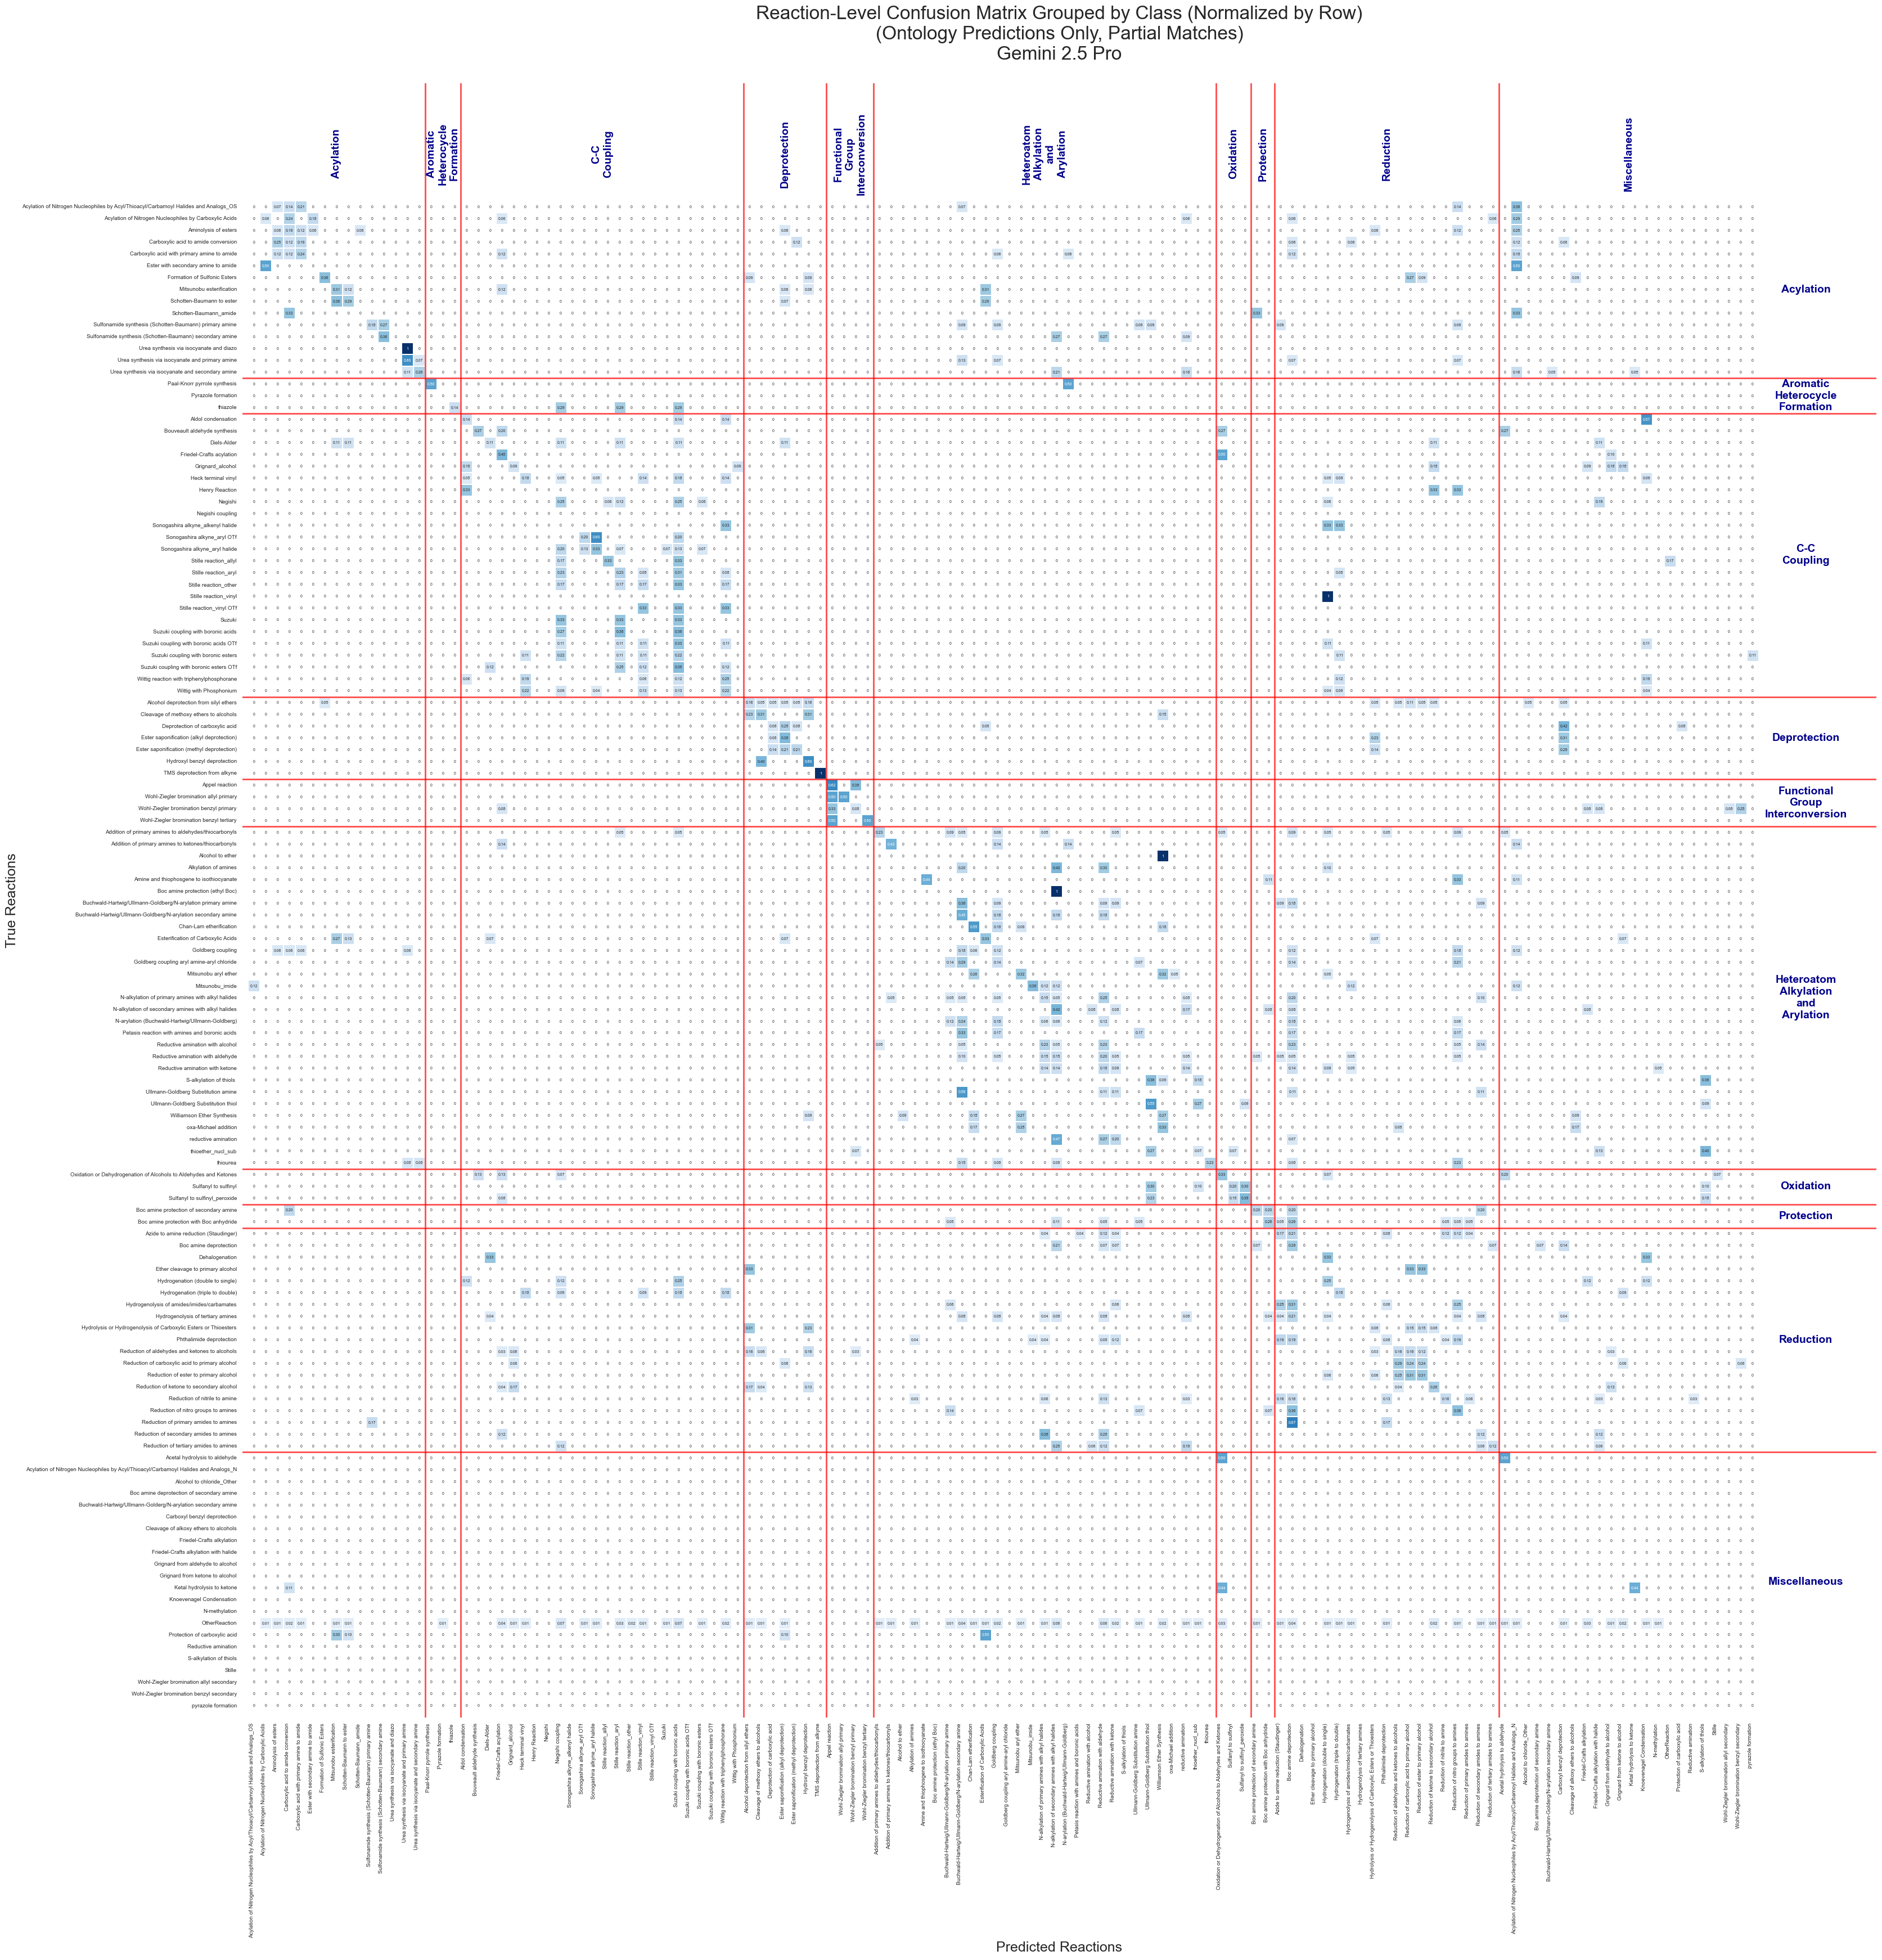

Reaction-Level Analysis (Ontology Only):
Total samples: 1454
Total unique reactions: 128
Reaction-level accuracy: 0.171

Reaction distribution by class:
Acylation: 15 reactions
Aromatic Heterocycle Formation: 3 reactions
C-C Coupling: 24 reactions
Deprotection: 7 reactions
Functional Group Interconversion: 4 reactions
Heteroatom Alkylation and Arylation: 29 reactions
Oxidation: 3 reactions
Protection: 2 reactions
Reduction: 19 reactions
Miscellaneous: 22 reactions


In [32]:
# Create reaction-level confusion matrix grouped by reaction class
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.colors as mcolors

# Filter to ontology predictions only for cleaner visualization
subset_partial_matches = subset[subset["result_is_partial_match"] == True].copy()
subset_ontology = subset_partial_matches[subset_partial_matches["predicted_isInOntology"] == True]

# Get unique reaction names for both true and predicted
true_reactions = sorted(subset_ontology['template_rxn_insight_name'].unique())
pred_reactions = sorted(subset_ontology['predicted_forwardReaction'].unique())

# Combine and get all unique reactions
all_reactions = sorted(list(set(true_reactions + pred_reactions)))

print(f"Total unique reactions: {len(all_reactions)}")
print(f"True reactions: {len(true_reactions)}")
print(f"Predicted reactions: {len(pred_reactions)}")

# Create reaction-level confusion matrix
cm_reactions = confusion_matrix(
    subset_ontology['template_rxn_insight_name'], 
    subset_ontology['predicted_forwardReaction'],
    labels=all_reactions
)

# Create mapping from reaction to class for grouping
reaction_to_class_for_reactions = {}
for reaction in all_reactions:
    reaction_to_class_for_reactions[reaction] = map_reaction_to_class(reaction)

# Group reactions by their mapped classes
class_groups = {}
for reaction in all_reactions:
    mapped_class = reaction_to_class_for_reactions[reaction]
    if mapped_class not in class_groups:
        class_groups[mapped_class] = []
    class_groups[mapped_class].append(reaction)

# Sort classes and put Miscellaneous last
sorted_classes = sorted([cls for cls in class_groups.keys() if cls != 'Miscellaneous'])
if 'Miscellaneous' in class_groups:
    sorted_classes.append('Miscellaneous')

# Reorder reactions by class grouping
ordered_reactions = []
class_boundaries = []
current_pos = 0

for class_name in sorted_classes:
    class_reactions = sorted(class_groups[class_name])
    ordered_reactions.extend(class_reactions)
    current_pos += len(class_reactions)
    class_boundaries.append(current_pos)

print(f"Ordered reactions by class: {len(ordered_reactions)}")

# Reorder confusion matrix according to class grouping
reaction_to_idx = {reaction: i for i, reaction in enumerate(all_reactions)}
ordered_indices = [reaction_to_idx[reaction] for reaction in ordered_reactions]

cm_ordered = cm_reactions[np.ix_(ordered_indices, ordered_indices)]

# Normalize by row (true labels) - properly handling zero rows
cm_normalized = np.zeros_like(cm_ordered, dtype=float)
row_sums = cm_ordered.sum(axis=1)
for i in range(cm_ordered.shape[0]):
    if row_sums[i] > 0:  # Only normalize non-zero rows
        cm_normalized[i] = cm_ordered[i] / row_sums[i]

# Create custom annotations that show 0 as "0" and others with 3 decimal places
annot_array = np.where(cm_normalized == 0, '0', 
                      np.where(cm_normalized == 1, '1',
                              np.char.mod('%.2f', cm_normalized)))

# Create custom colormap that starts with white for 0
colors = ['white'] + plt.cm.Blues(np.linspace(0.1, 1, 255)).tolist()
custom_cmap = mcolors.ListedColormap(colors)

# Create very large figure for reaction-level confusion matrix
fig, ax = plt.subplots(figsize=(35, 35))

# Create heatmap with custom annotations
sns.heatmap(
    cm_normalized, 
    annot=annot_array,  # Use custom annotation array
    fmt='',  # Empty format since we're providing custom annotations
    xticklabels=ordered_reactions,
    yticklabels=ordered_reactions,
    cmap=custom_cmap,  # Use custom colormap
    square=True,
    linewidths=0.1,
    cbar=False,
    annot_kws={'fontsize': 5},
    vmin=0,
    vmax=1.0,
    ax=ax
)

# Add class boundaries as lines
for boundary in class_boundaries[:-1]:  # Don't add line after last class
    ax.axhline(y=boundary, color='red', linewidth=2, alpha=0.7)
    ax.axvline(x=boundary, color='red', linewidth=2, alpha=0.7)

# Customize labels and title
ax.set_title('Reaction-Level Confusion Matrix Grouped by Class (Normalized by Row)\n(Ontology Predictions Only, Partial Matches)\nGemini 2.5 Pro', 
             fontsize=24, pad=30)
ax.set_xlabel('Predicted Reactions', fontsize=18)
ax.set_ylabel('True Reactions', fontsize=18)

# Rotate and adjust label properties
plt.setp(ax.get_xticklabels(), rotation=90, ha='right', fontsize=7)
plt.setp(ax.get_yticklabels(), rotation=0, fontsize=7)

# Add class labels on the right side and top with proper positioning - FAR OUTSIDE THE PLOT
y_pos = 0
for i, class_name in enumerate(sorted_classes):
    class_size = len(class_groups[class_name])
    y_center = y_pos + class_size / 2
    x_center = y_pos + class_size / 2
    
    # Break class name into lines at spaces
    class_name_lines = class_name.replace(' ', '\n')
    
    # Add class label on the right side - WAY OUTSIDE
    ax.text(len(ordered_reactions) + 4, y_center, class_name_lines,
            rotation=0, ha='center', va='center', 
            fontsize=14, fontweight='bold', color='darkblue',
            transform=ax.transData, clip_on=False)
    
    # Add class label on top - WAY OUTSIDE 
    ax.text(x_center, -4, class_name_lines,
            rotation=90, ha='center', va='center',
            fontsize=14, fontweight='bold', color='darkblue',
            transform=ax.transData, clip_on=False)
    
    y_pos += class_size

# Set plot limits to accommodate labels way outside
ax.set_xlim(-0.5, len(ordered_reactions) + 10)
ax.set_ylim(len(ordered_reactions) + 0.5, -10)

plt.tight_layout()

# Save with high DPI for readability
plt.savefig(f'{pdf_save_folder_path}/reaction_level_confusion_matrix_grouped_normalized.pdf', 
            dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

# Print summary statistics
total_reaction_samples = np.sum(cm_ordered)
accuracy_reactions = np.trace(cm_ordered) / total_reaction_samples

print(f"Reaction-Level Analysis (Ontology Only):")
print(f"="*50)
print(f"Total samples: {total_reaction_samples}")
print(f"Total unique reactions: {len(ordered_reactions)}")
print(f"Reaction-level accuracy: {accuracy_reactions:.3f}")

# Print class distribution
print(f"\nReaction distribution by class:")
for class_name in sorted_classes:
    print(f"{class_name}: {len(class_groups[class_name])} reactions")